# Dimensionality reduction

The first part of this introduction to dimensionality reduction focuses on feature **transformation**. We will show how to apply the following approaches:
1. PCA / MDS / UMAP / t-SNE ?  
2. Autoencoders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Load the data

In [2]:
data_with_labels = pd.read_csv("./data/tomatos_with_targets.txt", index_col=0)
data_with_labels.head()

,Solyc02g081130.1.1,Solyc12g038200.1.1,Solyc00g097760.1.1,Solyc08g069180.2.1,Solyc01g012570.1.1,Solyc08g076670.2.1,Solyc04g024840.2.1,Solyc09g074310.2.1,Solyc09g005370.1.1,Solyc12g098180.1.1,...,Solyc01g088670.1.1,Solyc06g063380.1.1,Solyc10g050450.1.1,Solyc07g051990.1.1,Solyc02g093490.2.1,Solyc10g007270.2.1,species,position,tissue,root
penn.Sh.floral,1.169216,0.000000,0.0,1.305753,0.0,4.634343,2.860965,3.242561,0.0,0.0,...,2.120579,0.0,0.000000,0.0,5.027894,0.0,penn,Sh,floral,0
penn.Sh.leaf,0.000000,0.858644,0.0,2.948383,0.0,4.653912,2.241161,2.922573,0.0,0.0,...,1.370140,0.0,2.006256,0.0,5.068390,0.0,penn,Sh,leaf,0
penn.Sh.root,0.000000,0.000000,0.0,0.469958,0.0,5.798938,3.217704,2.229663,0.0,0.0,...,1.970763,0.0,1.688588,0.0,4.889667,0.0,penn,Sh,root,1
penn.Sh.sdling,1.813992,0.000000,0.0,2.586147,0.0,4.771861,3.099842,3.452604,0.0,0.0,...,1.982446,0.0,1.651062,0.0,3.105620,0.0,penn,Sh,sdling,0
penn.Sh.stem,0.000000,0.000000,0.0,1.540887,0.0,4.907770,4.800873,1.973890,0.0,0.0,...,1.452937,0.0,0.000000,0.0,4.993720,0.0,penn,Sh,stem,0


## PCA

In [3]:
labels = ['species','position','tissue','root']
data = data_with_labels.drop(columns = labels, axis = 1)
pc = PCA(n_components=10)
data_transformed = pc.fit_transform(data)

First, we visualize the data based on the first two principal components. This will show us the main sources of variation. Since we do not have any prior knowledge which experimental factors have the greatest influence on the gene expression, we use all the label information that is available to us to mark the samples (here, the color indicates the tissue, and the shape indicates the combination of species and growing condition). What is the main source of variation in this data set? Side remark: If we have more label combinations than can be distinguished in one plot, we can produce multiple plots, e.g. one for each labeling type (tissue, species, condition).

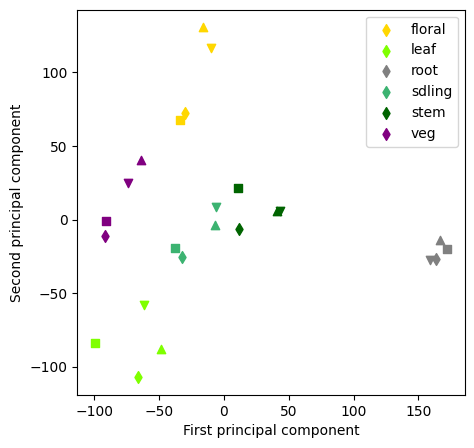

In [23]:
tissue_dict = {'floral': 'gold', 'leaf': 'chartreuse', 'root': 'gray', 'sdling': 'mediumseagreen', 'stem': 'darkgreen', 'veg': 'purple'}
species_condition_dict = {'penn.Sun': 's', 'penn.Sh': 'd', 'M82.Sun': '^', 'M82.Sh': 'v'}
plt.figure(figsize=(5, 5))
for i in range(0,len(data.index)):
    plt.scatter(data_transformed[i,0], data_transformed[i,1], marker=species_condition_dict['.'.join([data_with_labels.iloc[i]['species'], data_with_labels.iloc[i]['position']])], c=tissue_dict[data_with_labels.iloc[i]['tissue']])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend(tissue_dict, loc="upper right")
plt.show()

The plot reveals that the tissue type is the main source of variation in the data. Samples of the same tissue type are clustered together. Furthermore, the second principal component puts floral tissue and leaf tissue to opposite extremes, separating them from all other tissues.

Next, we will also have a look at the third principal component (at index 2) and check its combinations with the first two components.

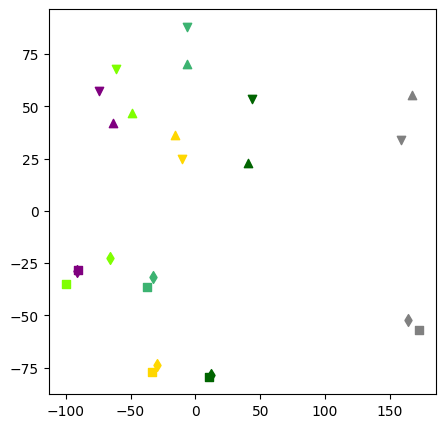

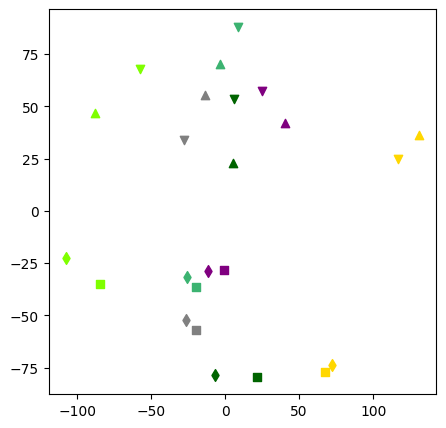

In [25]:
xval = [0,1]
yval = [2,2]
for k in range(0,len(xval)):
    plt.figure(figsize=(5, 5))
    for i in range(0,len(data.index)):
        plt.scatter(data_transformed[i,xval[k]], data_transformed[i,yval[k]], marker=species_condition_dict['.'.join([data_with_labels.iloc[i]['species'], data_with_labels.iloc[i]['position']])], c=tissue_dict[data_with_labels.iloc[i]['tissue']])
    plt.show()

Clearly, the third principal component separates the squares and diamonds from the triangles, i.e. it separates the two species. By changing xval and yval, you can visualize combinations with even higher principal components. However, they do not contain a separation of growing conditions, so this factor does not play a big role for the gene expression variation in this data set. How should we decide on the number of principal components to include in further analyses? Here we knew from our labels that it might be worthwile to go beyond tissue effects, but in general scientists typically interrogate the cumulative explained variance to see how many components are needed to retain a certain percentage of variance (e.g. 80%).

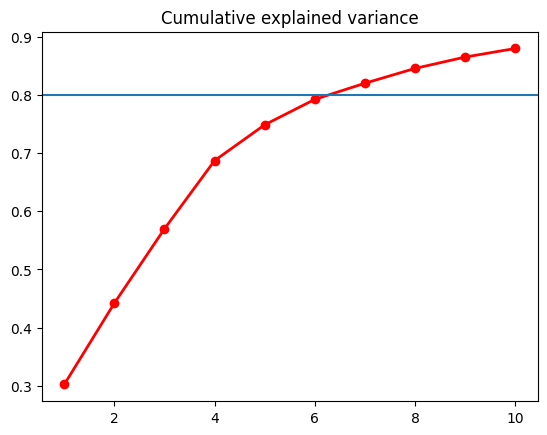

In [34]:
pc.explained_variance_ratio_
pc.explained_variance_ratio_.cumsum()
PC_values = np.arange(pc.n_components_) + 1
plt.plot(PC_values, pc.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.axhline(0.8)
plt.title('Cumulative explained variance')
plt.show()

- How many components to look at: Percent of variance, screeplot
- Top-weight genes PC3 (known function in drought tolerance)
- UMAP
- MDS
- Autoencoders (scArches, plain VAE or rna-seq-vae)
- Precision-recall tradeoff of dim reduction
- Discussion advantages/disadvantages of methods, when to use which one (found some literature already)
- Feature aggregation: data-driven feature clustering or knowledge-based feature aggregation to reduce dimensionality (either include in feature transformation or make an own notebook)